In [ ]:
#STEP-1 Importing the required ML Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns 
import PIL
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [ ]:
import tensorflow as tf
from pathlib import Path
# loading data from drive
dataset_url = "file:///content/drive/MyDrive/cnn_dataset.zip"

archive = tf.keras.utils.get_file("cnn_dataset.zip", origin=dataset_url, extract=True)
print(archive)
data_dir = Path(archive).with_suffix("").as_posix()
print(data_dir)

122902352/122902352 [==============================] - 3s 0us/step
/root/.keras/datasets/cnn_dataset.zip
/root/.keras/datasets/cnn_dataset


In [ ]:
!ls /root/.keras/datasets/


cnn_dataset  cnn_dataset.zip  __MACOSX


In [ ]:
# Storing the path of the data
data_dir = Path(data_dir)
print(data_dir)

print(list(data_dir.glob('*')))


/root/.keras/datasets/cnn_dataset
[PosixPath('/root/.keras/datasets/cnn_dataset/dogs'), PosixPath('/root/.keras/datasets/cnn_dataset/food'), PosixPath('/root/.keras/datasets/cnn_dataset/vehicles'), PosixPath('/root/.keras/datasets/cnn_dataset/.DS_Store')]


In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Calculating the image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

30000


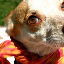

In [ ]:
#Printing the 1st image in dogs folder
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))

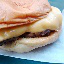

In [ ]:
#Printing the 1st image in food folder
food = list(data_dir.glob('food/*'))
PIL.Image.open(str(food[0]))

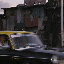

In [ ]:
#Printing the 1st image in vehicles folder
vehicle = list(data_dir.glob('vehicles/*'))
PIL.Image.open(str(vehicle[0]))

In [ ]:
images = list(data_dir.glob('*/*.jpg'))

Preprocessing: https://keras.io/api/preprocessing/image/

AlexNet Architecture

In [ ]:
#Storing the path of data into dataset_path
dataset_path = data_dir

#initializing the image size
image_size = (64, 64)

#Initializing the batch size
batch_size = 32


#Defining the parameters for height and width for resizing
img_height = 224
img_width = 224

import tensorflow as tf
import os

def create_training_dataset(dataset_path, batch_size, sz):
    class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    print(class_names)

    #Performing preprocessing
    def get_label(file_path):
      parts = tf.strings.split(file_path, os.path.sep)
      one_hot = parts[-2] == class_names
      return tf.argmax(one_hot)
    def decode_img(img):
      img = tf.io.decode_jpeg(img, channels=3)
      return tf.image.resize(img, [img_height, img_width])
    def process_path(file_path):
      label = get_label(file_path)
      img = tf.io.read_file(file_path)
      img = decode_img(img)
      return img, label

    file_paths = []
    labels = []

    #Extracting the path
    for i, class_name in enumerate(class_names):
        print(i)
        class_dir = os.path.join(dataset_path, class_name)
        for file_name in os.listdir(class_dir):
            file_path = str(class_dir+'/'+file_name)
            file_paths.append(file_path)
            labels.append(i)

    print(file_paths)
    dataset = tf.data.Dataset.list_files(file_paths)
    dataset = dataset.skip(int((1-sz)*image_count))

    dataset = dataset.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Shuffle and batch the dataset
    dataset = dataset.shuffle(buffer_size=1000, seed=3407)
    dataset = dataset.batch(batch_size)
    
    dataset = dataset.prefetch(1)

    return dataset

#splitting the data into train, test and validation sets
trainsize = 0.8
valsize = 0.1
testsize = 0.1


train_dataset = create_training_dataset(dataset_path, batch_size, trainsize)

val_dataset = create_training_dataset(dataset_path, batch_size, valsize)

test_dataset = create_training_dataset(dataset_path, batch_size, testsize)


['dogs', 'food', 'vehicles']
0
1
2
['/root/.keras/datasets/cnn_dataset/dogs/1088.jpg', '/root/.keras/datasets/cnn_dataset/dogs/3811.jpg', '/root/.keras/datasets/cnn_dataset/dogs/2133.jpg', '/root/.keras/datasets/cnn_dataset/dogs/5613.jpg', '/root/.keras/datasets/cnn_dataset/dogs/1455.jpg', '/root/.keras/datasets/cnn_dataset/dogs/3328.jpg', '/root/.keras/datasets/cnn_dataset/dogs/2169.jpg', '/root/.keras/datasets/cnn_dataset/dogs/185.jpg', '/root/.keras/datasets/cnn_dataset/dogs/6767.jpg', '/root/.keras/datasets/cnn_dataset/dogs/387.jpg', '/root/.keras/datasets/cnn_dataset/dogs/7372.jpg', '/root/.keras/datasets/cnn_dataset/dogs/7716.jpg', '/root/.keras/datasets/cnn_dataset/dogs/8137.jpg', '/root/.keras/datasets/cnn_dataset/dogs/2629.jpg', '/root/.keras/datasets/cnn_dataset/dogs/6993.jpg', '/root/.keras/datasets/cnn_dataset/dogs/4064.jpg', '/root/.keras/datasets/cnn_dataset/dogs/252.jpg', '/root/.keras/datasets/cnn_dataset/dogs/8935.jpg', '/root/.keras/datasets/cnn_dataset/dogs/4387.jpg'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import os
from collections import Counter

subdirs = os.listdir(data_dir)

# Count the number of images in each class
image_counts = {}
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        images = os.listdir(subdir_path)
        image_counts[subdir] = len(images)

# Print the image counts for each class
print("Image counts:")
for subdir, count in image_counts.items():
    print(f"{subdir}: {count}")

Image counts:
dogs: 10000
food: 10000
vehicles: 10000


In [ ]:
image_counts

{'dogs': 10000, 'food': 10000, 'vehicles': 10000}

In [ ]:
class AlexNet(tf.keras.Model):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3))
        self.maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))
        self.conv2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same')
        self.maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))
        self.conv3 = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')
        self.conv4 = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')
        self.conv5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')
        self.maxpool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(4096, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(4096, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        x = self.dense3(x)
        return x

    #Training the model defined by defining the necessary hyperparameters
    def train_model(model, X_train, Y_train, X_test, Y_test, batch_size, epochs):
      train_acc_list=[]
      valid_acc_list=[]
      optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001)
      loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
      train_loss = tf.keras.metrics.SparseCategoricalCrossentropy(name='train_loss')
      test_loss = tf.keras.metrics.SparseCategoricalCrossentropy(name='test_loss')
      train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
      test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')    
      train_loss_list, valid_loss_list = [], []

      #Running the loop for 20 epocs as specified in the parameter below [calculating loss and accuracy]  
      for epoch in range(epochs):
          train_loss.reset_states()
          train_accuracy.reset_states()
          test_loss.reset_states()
          test_accuracy.reset_states()

          for i in range(0, len(X_train), batch_size):
              batch_X = X_train[i:i+batch_size]
              batch_Y = Y_train[i:i+batch_size]
              # print("batch_Y: ",batch_Y)
              with tf.GradientTape() as tape:
                  predictions = model(batch_X, training=True)
                  loss = loss_fn(batch_Y, predictions)
        
              gradients = tape.gradient(loss, model.trainable_variables)
              optimizer.apply_gradients(zip(gradients, model.trainable_variables))

              train_loss.update_state(batch_Y, predictions)
              train_accuracy.update_state(batch_Y, predictions)
          test_predictions = model(X_test, training=False)
          test_loss_value = loss_fn(Y_test, test_predictions)
          test_loss.update_state(Y_test, test_predictions)
          test_accuracy.update_state(Y_test, test_predictions)
            
          train_loss_list.append(train_loss.result().numpy())
          valid_loss_list.append(test_loss.result().numpy())
          train_acc_list.append(train_accuracy.result().numpy())
          valid_acc_list.append(test_accuracy.result().numpy())

          print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss.result():.4f}, Train Accuracy: {train_accuracy.result():.4f}, Validation Loss: {test_loss.result():.4f}, Validation Accuracy: {test_accuracy.result():.4f}')
        
      return train_loss_list, valid_loss_list, train_accuracy.result().numpy(), test_accuracy.result().numpy(), train_acc_list, valid_acc_list


In [ ]:
#Splitting the data for training
X_train = []
Y_train = []
for x_batch, y_batch in train_dataset:
    X_train.append(x_batch.numpy())
    Y_train.append(y_batch.numpy())
X_train = np.concatenate(X_train, axis=0)
Y_train = np.concatenate(Y_train, axis=0)

#Splitting the data for validation
X_val = []
Y_val = []
for x_batch, y_batch in val_dataset:
    X_val.append(x_batch.numpy())
    Y_val.append(y_batch.numpy())
X_val = np.concatenate(X_val, axis=0)
Y_val = np.concatenate(Y_val, axis=0)

#Printing the spaes of the data split into train and validation
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
model = AlexNet()
train_loss_list, valid_loss_list, train_accuracy, test_accuracy, train_acc_list, valid_acc_list = model.train_model(X_train, Y_train, X_val, Y_val, batch_size=32, epochs=30)

#Printing the accuracy and length of the data split into train and validation
print("Final test accuracy:", test_accuracy)
print("Length of X_train:", len(X_train))
print("Length of X_val:", len(X_val))
print("Length of Y_train:", len(Y_train))
print("Length of Y_val:", len(Y_val))



X_train shape: (24001, 224, 224, 3)
Y_train shape: (24001,)
X_val shape: (3000, 224, 224, 3)
Y_val shape: (3000,)


Epoch: 1/30, Train Loss: 0.8865, Train Accuracy: 0.6484, Validation Loss: 0.6224, Validation Accuracy: 0.7360
Epoch: 2/30, Train Loss: 0.6206, Train Accuracy: 0.7466, Validation Loss: 1.0190, Validation Accuracy: 0.6270
Epoch: 3/30, Train Loss: 0.5498, Train Accuracy: 0.7815, Validation Loss: 0.4539, Validation Accuracy: 0.8163
Epoch: 4/30, Train Loss: 0.5077, Train Accuracy: 0.8005, Validation Loss: 0.4476, Validation Accuracy: 0.8223
Epoch: 5/30, Train Loss: 0.4749, Train Accuracy: 0.8128, Validation Loss: 0.4542, Validation Accuracy: 0.8203
Epoch: 6/30, Train Loss: 0.4545, Train Accuracy: 0.8214, Validation Loss: 0.3917, Validation Accuracy: 0.8437
Epoch: 7/30, Train Loss: 0.4345, Train Accuracy: 0.8319, Validation Loss: 0.3756, Validation Accuracy: 0.8497
Epoch: 8/30, Train Loss: 0.4205, Train Accuracy: 0.8394, Validation Loss: 0.4109, Validation Accuracy: 0.8407
Epoch: 9/30, Train Loss: 0.4059, Train Accuracy: 0.8412, Validation Loss: 0.3444, Validation Accuracy: 0.8650
Epoch: 10/

In [ ]:
X_test = []
Y_test = []
for x_batch, y_batch in test_dataset:
    X_test.append(x_batch.numpy())
    Y_test.append(y_batch.numpy())
X_test = np.concatenate(X_test, axis=0)
Y_test = np.concatenate(Y_test, axis=0)

In [ ]:
test_loss_list = []
test_acc_list = []

#Defining a model for testing the data
def test_model(model, X_test, Y_test, batch_size):
    test_loss = tf.keras.metrics.SparseCategoricalCrossentropy(name='test_loss')
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')    
    test_loss_list, test_acc_list = [], []

    for i in range(0, len(X_test), batch_size):
        batch_X = X_test[i:i+batch_size]
        batch_Y = Y_test[i:i+batch_size]

        predictions = model(batch_X, training=False)
        loss = test_loss(batch_Y, predictions)

        test_loss.update_state(batch_Y, predictions)
        test_accuracy.update_state(batch_Y, predictions)

        test_loss_list.append(test_loss.result().numpy())
        test_acc_list.append(test_accuracy.result().numpy())

    print(f'Test Loss: {test_loss.result():.4f}, Test Accuracy: {test_accuracy.result():.4f}')
        
    return test_loss_list, test_acc_list

In [ ]:
#Testing the data
test_loss_list , test_acc_list = test_model(model, X_test, Y_test, batch_size)

Test Loss: 0.2480, Test Accuracy: 0.9087


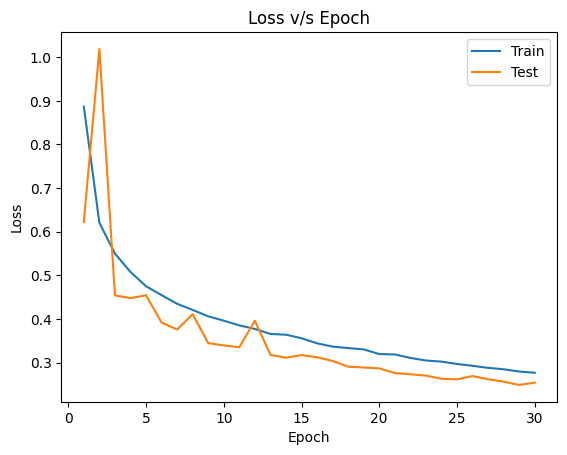

In [ ]:
#Loss vs Epoch Graph [train and validation data]
plt.plot(range(1, len(train_loss_list)+1), train_loss_list, label='Train')
plt.plot(range(1, len(valid_loss_list)+1), valid_loss_list, label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss v/s Epoch')
plt.legend()
plt.show()

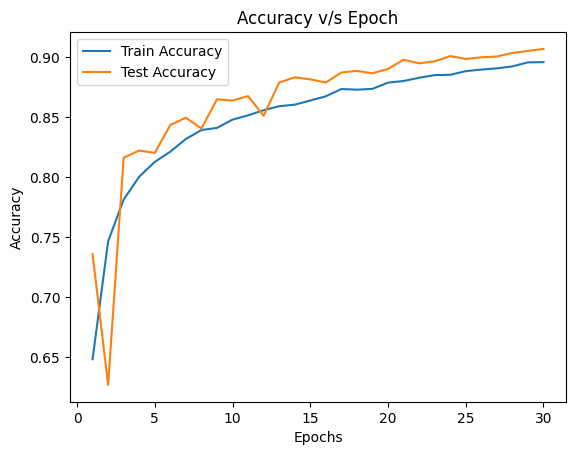

In [ ]:
#Accuracy vs Epoch Graph [train and validation data]
plt.plot(range(1, len(train_acc_list)+1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, len(valid_acc_list)+1), valid_acc_list, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s Epoch')
plt.legend()
plt.show()

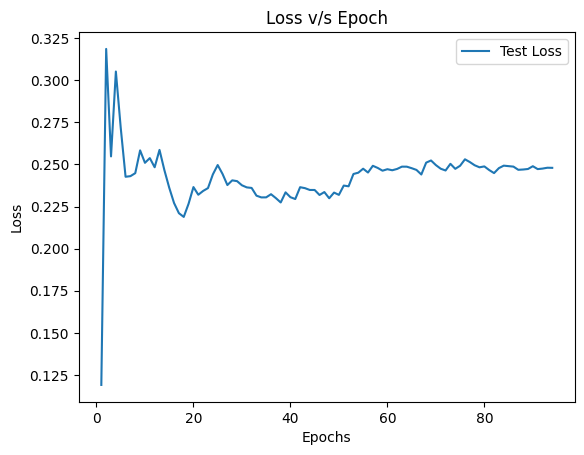

In [ ]:
#Loss vs Epoch Graph [test data]
plt.plot(range(1, len(test_loss_list)+1), test_loss_list, label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss v/s Epoch')
plt.legend()
plt.show()

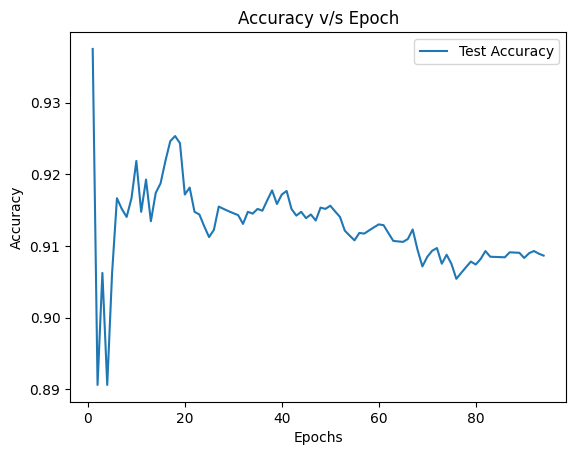

In [ ]:
#Accuracy vs Epoch Graph [test data]
plt.plot(range(1, len(test_acc_list)+1), test_acc_list, label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s Epoch')
plt.legend()
plt.show()

In [ ]:
#saving the weights
model.save_weights('weights')

In [ ]:
model.load_weights('weights')